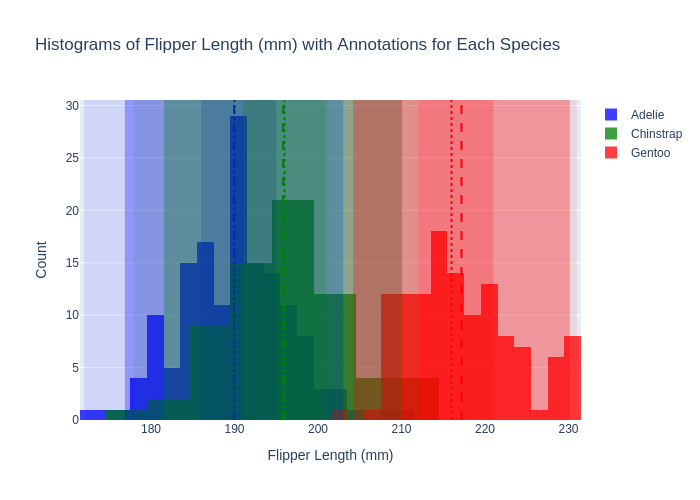

In [4]:
# Question 1

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Define a function to add vertical lines and rectangles to a histogram
def add_annotations(fig, data, color):
    # Compute statistics
    mean = data.mean()
    median = data.median()
    std_dev = data.std()
    iqr = data.quantile(0.75) - data.quantile(0.25)
    min_value = data.min()
    max_value = data.max()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    # Add mean and median vertical lines
    fig.add_vline(x=mean, line=dict(color=color, dash="dash"), name='Mean')
    fig.add_vline(x=median, line=dict(color=color, dash="dot"), name='Median')

    # Add range (min to max) shaded rectangle
    fig.add_vrect(x0=min_value, x1=max_value, fillcolor=color, opacity=0.1, line_width=0, name='Range')

    # Add IQR shaded rectangle
    fig.add_vrect(x0=q1, x1=q3, fillcolor=color, opacity=0.2, line_width=0, name='IQR')

    # Add 2*std_dev range shaded rectangle
    fig.add_vrect(x0=mean-2*std_dev, x1=mean+2*std_dev, fillcolor=color, opacity=0.3, line_width=0, name='2*Std Dev')

# Plot histograms for each species
fig = go.Figure()

species_list = penguins['species'].dropna().unique()
colors = ['blue', 'green', 'red']

for species, color in zip(species_list, colors):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    
    # Create histogram for species
    fig.add_trace(go.Histogram(x=species_data, name=species, opacity=0.75, marker_color=color))
    
    # Add vertical lines and shaded rectangles
    add_annotations(fig, species_data, color)

# Update layout
fig.update_layout(
    title="Histograms of Flipper Length (mm) with Annotations for Each Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode="overlay"
)

# Show the figure
fig.show(renderer="png")

# Summary - Initial Request: You asked for help with using fig.add_[h/v]line() and fig.add_[h/v]rect() to mark various statistical measures on histograms of flipper_length_mm for each species in the penguins dataset using Plotly. Code Provided: I provided Python code that: Loads the penguins dataset. Creates histograms of flipper_length_mm for each species. Adds vertical lines for the mean and median. Adds shaded regions for the range, interquartile range (IQR), and a range defined by two standard deviations away from the mean.
# https://chatgpt.com/share/66f306ba-7be0-8004-9b35-e7c4c1954032

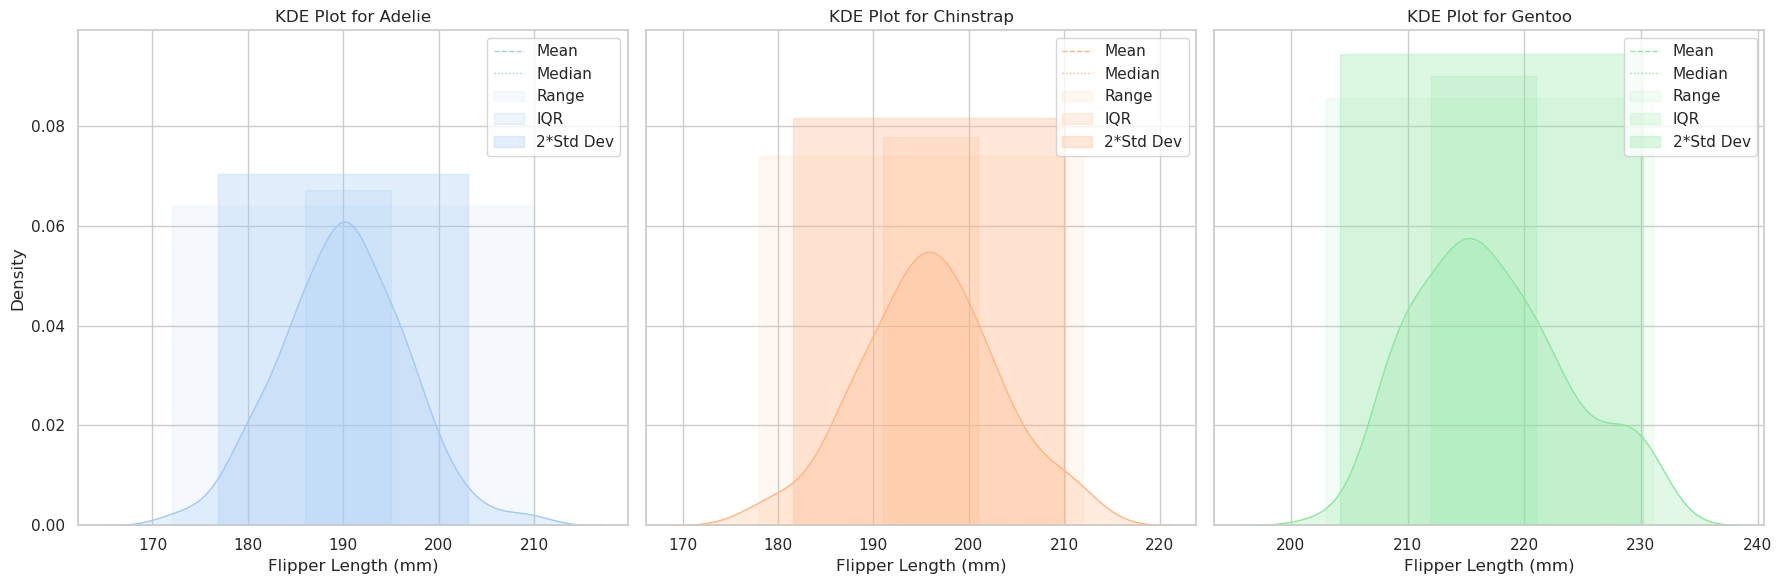

In [2]:
# Question 2

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Set theme and style
sns.set_theme(style='whitegrid', context='notebook', palette='pastel')

# Define the plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)
species_list = penguins['species'].dropna().unique()
colors = sns.color_palette('pastel', n_colors=len(species_list))

for i, (species, color) in enumerate(zip(species_list, colors)):
    ax = axes[i]
    species_data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()

    # Create KDE plot
    sns.kdeplot(species_data, ax=ax, color=color, fill=True)
    
    # Compute statistics
    mean = species_data.mean()
    median = species_data.median()
    std_dev = species_data.std()
    iqr = species_data.quantile(0.75) - species_data.quantile(0.25)
    min_value = species_data.min()
    max_value = species_data.max()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)

    # Add mean and median horizontal lines
    ax.axhline(y=0, color=color, linestyle='--', linewidth=1, label='Mean')
    ax.axhline(y=0, color=color, linestyle=':', linewidth=1, label='Median')

    # Add range (min to max) shaded area
    ax.fill_betweenx(y=[0, ax.get_ylim()[1]], x1=min_value, x2=max_value, color=color, alpha=0.1, label='Range')

    # Add IQR shaded area
    ax.fill_betweenx(y=[0, ax.get_ylim()[1]], x1=q1, x2=q3, color=color, alpha=0.2, label='IQR')

    # Add 2*std_dev shaded area
    ax.fill_betweenx(y=[0, ax.get_ylim()[1]], x1=mean-2*std_dev, x2=mean+2*std_dev, color=color, alpha=0.3, label='2*Std Dev')

    # Title and labels
    ax.set_title(f'KDE Plot for {species}')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Summary - Follow-Up Request: You requested the same analysis but using Seaborn KDE plots instead of histograms. You also asked to organize the plots in a row and use Matplotlib for additional annotations. Theme and Style Exploration: You inquired about Seaborn themes and colors based on sns.set_style(), sns.set_theme(), and the palette parameter. I explained how to use these features to customize the appearance of plots and provided an updated example incorporating these customizations.
# https://chatgpt.com/share/66f306ba-7be0-8004-9b35-e7c4c1954032

Question 3

To Chatbot: A box plot displays the quartiles and outliers of a dataset and describes the distribution of data with a "box" and "whiskers, it does not describe the shape of data distribution. A histogram shows the frequency of datapoint at each given range through bars and helps visualize the shape of the spread. KDE is a smoother version of histogram where curved lines are to replaced the bars which describes the frequency, good for estimation. 

Preference and rationale: While I believe that all three visualization method are very useful under different circumstances, I personally prefer the form of histogram. This is because that it is more precise as it shows the counts of data points and the same time it can also roughly show the distribution shape and helps giving good estimations. It is in the middle ground for  showing key statistics and having a good estimating of distribution. Additionally, the cons listed by Chatgpt for histogram is somehow adjustable, for example the number of bins can be changing.

Data Visualization Interests: You’ve expressed interest in using Seaborn and Matplotlib for data visualization, particularly for analyzing distributions of datasets.

Understanding Box Plots, Histograms, and KDE: You provided a clear description of how box plots, histograms, and Kernel Density Estimates (KDEs) work. We discussed how:

Summary - Data Visualization Interests: You’ve expressed interest in using Seaborn and Matplotlib for data visualization, particularly for analyzing distributions of datasets.

Understanding Box Plots, Histograms, and KDE: You provided a clear description of how box plots, histograms, and Kernel Density Estimates (KDEs) work. We discussed how:

Box plots display summary statistics and outliers but don't show distribution shape.
Histograms visualize the frequency of data points in intervals, making the shape of the distribution clear.
KDEs offer a smooth estimate of the distribution but rely on the smoothing parameter.
Pros and Cons: I provided a detailed pros and cons list for each of the three visualization methods, highlighting their strengths and limitations in different scenarios. This included how:

Box plots are compact and great for comparisons but don’t show distribution shapes.
Histograms are easy to understand and reveal frequency but are sensitive to bin size.
KDEs offer smooth, continuous distribution estimates but can be harder to interpret and require careful bandwidth selection.

https://chatgpt.com/share/66f3984a-867c-8004-be39-f35a9135bcbf

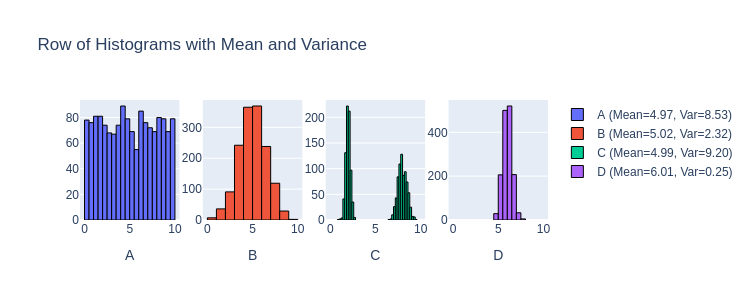

In [5]:
# Question 4

from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Calculate mean and variance for each dataset
mean1, var1 = np.mean(data1), np.var(data1, ddof=1)
mean2, var2 = np.mean(data2), np.var(data2, ddof=1)
mean3, var3 = np.mean(data3), np.var(data3, ddof=1)
mean4, var4 = np.mean(data4), np.var(data4, ddof=1)

# Create subplots
fig = make_subplots(rows=1, cols=4)

# Add histograms for each dataset
fig.add_trace(go.Histogram(x=data1, name=f'A (Mean={mean1:.2f}, Var={var1:.2f})', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name=f'B (Mean={mean2:.2f}, Var={var2:.2f})', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name=f'C (Mean={mean3:.2f}, Var={var3:.2f})', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name=f'D (Mean={mean4:.2f}, Var={var4:.2f})', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

# Update layout and axes
fig.update_layout(height=300, width=750, title_text="Row of Histograms with Mean and Variance")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

# Standardize xbins across histograms
for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

fig.show(renderer="png")

# Histogram A and histogram C have similar means and similar variances
# Histogram B and histogram C (or Histogram A and histogram B) have similar means but quite different variances
# Histogram B and histogram D have similar variances but quite different means
# Histogram C and histogram D (or Histogram A and histogram D) have quite different means but quite different variances

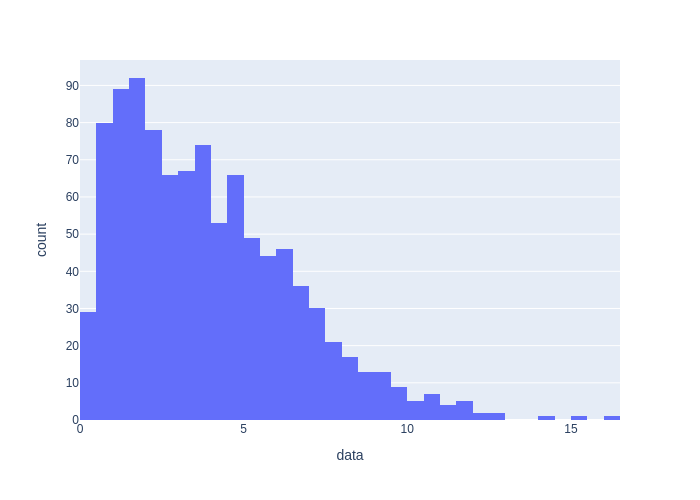

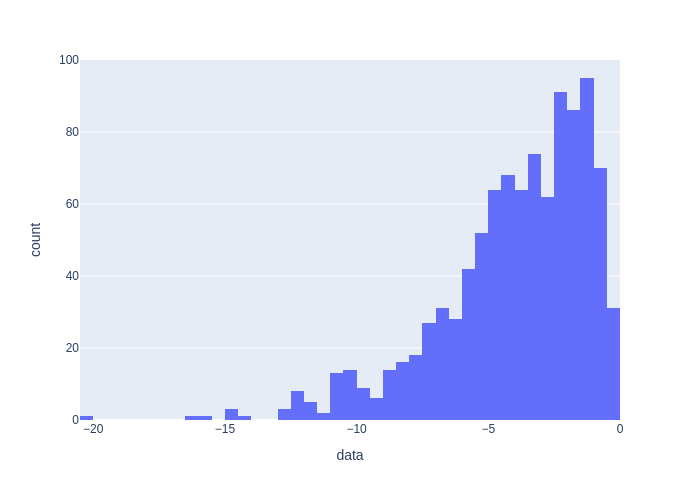

In [3]:
# Question 5

# Affecting by the extreme high values in a right skewed distribution, the median will be greater than the median. Similarly, in a left skewed distribution, the median will be less than the mode. This is because that the number of extreme values are quite little but the values are either pretty high or pretty low.

from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px  # Import Plotly Express for visualization

# Generate 1000 random values from a Gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram of the data
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# Show the figure (you can use fig1.show() in a normal Python environment)
fig1.show(renderer="png")  # Use this if you're submitting to GitHub or MarkUs

# Calculate mean and median of sample1
mean_sample1 = sample1.mean()
median_sample1 = np.quantile(sample1, 0.5)  # 50th percentile (median)

# Generate 1000 random values from a Gamma distribution, then negate them
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Optionally, create a histogram for sample2
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")

# Summary - Dataset Exploration: We discussed exploring the relationship between the mean and median and how they relate to right and left skewness in distributions. I explained that in right-skewed distributions, the mean is typically greater than the median, while in left-skewed distributions, the mean is less than the median. For symmetric distributions, the mean and median are equal. Code Breakdown: You provided a snippet of Python code and asked for an explanation. The code: Imports necessary libraries. Generates a sample from a gamma distribution and creates a histogram of this data. Calculates the mean and median of the sample. Creates a new sample by negating the gamma distribution values.
# https://chatgpt.com/share/66f494b7-b974-8004-98bf-b398b3d992a6

Sample Mean of gdpPercap: 9917.85
Sample Variance of gdpPercap: 124414278.42


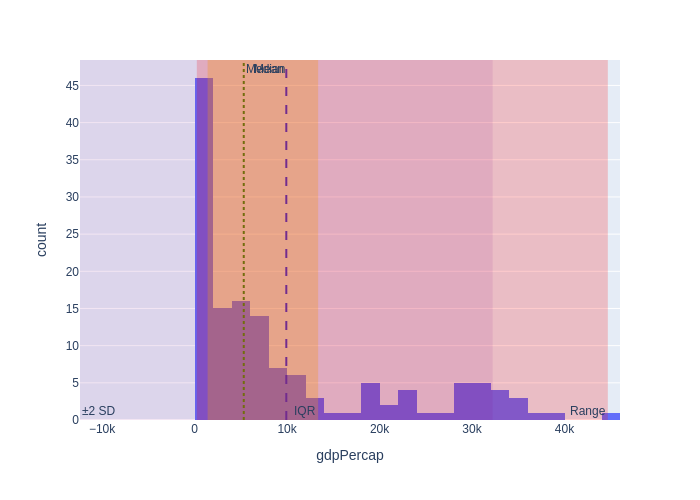

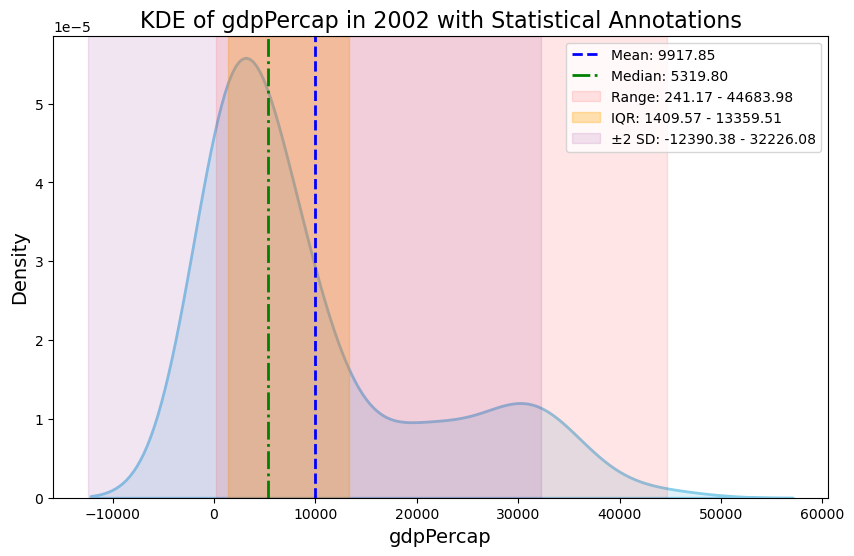

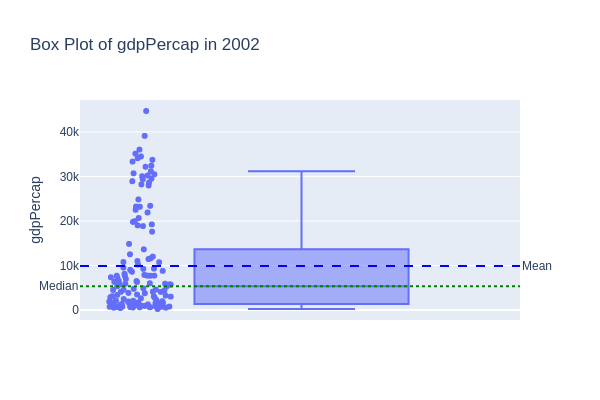

In [6]:
# Question 6

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/kirenz/datasets/master/gapminder.csv"
df = pd.read_csv(url)

# Step 2: Filter the dataset for the year 2002
df_2002 = df[df['year'] == 2002]

# Step 3: Compute statistics
gdpPercap = df_2002['gdpPercap']
mean_gdp = gdpPercap.mean()  # Sample mean
std_gdp = gdpPercap.std(ddof=1)  # Sample standard deviation (using ddof=1 for sample)
var_gdp = gdpPercap.var(ddof=1)  # Sample variance (using ddof=1 for sample)
median_gdp = gdpPercap.median()
min_gdp = gdpPercap.min()
max_gdp = gdpPercap.max()
q1 = gdpPercap.quantile(0.25)
q3 = gdpPercap.quantile(0.75)
iqr = q3 - q1
lower_2sd = mean_gdp - 2 * std_gdp
upper_2sd = mean_gdp + 2 * std_gdp

# --- Print Sample Mean and Variance ---
print(f"Sample Mean of gdpPercap: {mean_gdp:.2f}")
print(f"Sample Variance of gdpPercap: {var_gdp:.2f}")

# --- Plotly Histogram with Annotations ---

# Step 4: Create the Plotly histogram
fig_hist = px.histogram(df_2002, x='gdpPercap', nbins=30)

# Step 5: Add lines for mean and median
fig_hist.add_vline(x=mean_gdp, line=dict(color="blue", width=2, dash="dash"), annotation_text="Mean", annotation_position="top left")
fig_hist.add_vline(x=median_gdp, line=dict(color="green", width=2, dash="dot"), annotation_text="Median", annotation_position="top right")

# Step 6: Add shaded regions for range, IQR, and ±2 SD
# Range
fig_hist.add_vrect(x0=min_gdp, x1=max_gdp, fillcolor="red", opacity=0.2, line_width=0, annotation_text="Range", annotation_position="bottom right")

# IQR
fig_hist.add_vrect(x0=q1, x1=q3, fillcolor="orange", opacity=0.3, line_width=0, annotation_text="IQR", annotation_position="bottom right")

# ±2 Standard Deviations
fig_hist.add_vrect(x0=lower_2sd, x1=upper_2sd, fillcolor="purple", opacity=0.1, line_width=0, annotation_text="±2 SD", annotation_position="bottom left")

# --- Seaborn KDE Plot ---

# Step 7: Create the figure and axis for KDE plot
plt.figure(figsize=(10, 6))

# Step 8: Plot the KDE for gdpPercap using seaborn
sns.kdeplot(gdpPercap, fill=True, color="skyblue", linewidth=2)

# Step 9: Add vertical lines for the mean and median
plt.axvline(mean_gdp, color='blue', linestyle='--', linewidth=2, label=f"Mean: {mean_gdp:.2f}")
plt.axvline(median_gdp, color='green', linestyle='-.', linewidth=2, label=f"Median: {median_gdp:.2f}")

# Step 10: Add shaded regions for range, IQR, and ±2 SD
plt.axvspan(min_gdp, max_gdp, color='red', alpha=0.1, label=f"Range: {min_gdp:.2f} - {max_gdp:.2f}")
plt.axvspan(q1, q3, color='orange', alpha=0.3, label=f"IQR: {q1:.2f} - {q3:.2f}")
plt.axvspan(lower_2sd, upper_2sd, color='purple', alpha=0.1, label=f"±2 SD: {lower_2sd:.2f} - {upper_2sd:.2f}")

# Step 11: Add labels, title, and legend
plt.title("KDE of gdpPercap in 2002 with Statistical Annotations", fontsize=16)
plt.xlabel("gdpPercap", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend()

# --- Plotly Box Plot ---

# Step 12: Create the Plotly box plot
fig_box = px.box(df_2002, y="gdpPercap", points="all", title="Box Plot of gdpPercap in 2002", width=600, height=400)

# Step 13: Add a horizontal line for the mean
fig_box.add_hline(y=mean_gdp, line=dict(color="blue", width=2, dash="dash"), annotation_text="Mean", annotation_position="right")

# Step 14: Add a horizontal line for the median (already included in the box plot)
fig_box.add_hline(y=median_gdp, line=dict(color="green", width=2, dash="dot"), annotation_text="Median", annotation_position="left")

# Step 15: Customize the layout
fig_box.update_layout(
    yaxis_title="gdpPercap",
    xaxis_title="",
    showlegend=False
)

# --- Display All Plots in Sequence ---

# Show Plotly histogram
fig_hist.show(renderer="png")

# Show Seaborn KDE plot
plt.show()

# Show Plotly box plot
fig_box.show(renderer="png")

# Summary - In our interactions, we discussed how to visualize the gdpPercap data from the 2002 Gapminder dataset using various plots. Initially, we created a Plotly histogram with annotations for mean, median, range, interquartile range (IQR), and ±2 standard deviations. We then generated a Seaborn KDE plot with similar statistical annotations. Following that, we added a Plotly box plot to visualize the distribution, including mean and median markers. Finally, we computed and displayed the sample mean and variance of the gdpPercap data. The visualizations and statistical measures were printed sequentially to provide a comprehensive view of the dataset.
# https://chatgpt.com/share/66f4a9bd-e55c-8004-bbee-b6c0c20f8296

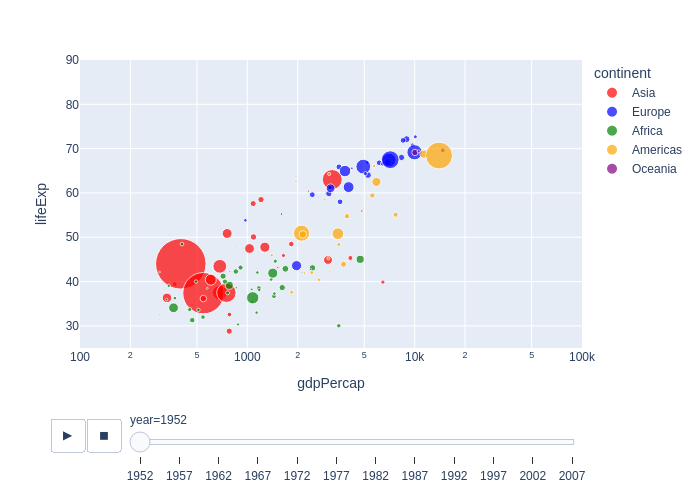

In [7]:
#Question 7

import plotly.express as px 

# Load the gapminder dataset
df = px.data.gapminder()

# Define custom colors for each continent
color_map = {
    'Asia': 'red',
    'Europe': 'blue',
    'Africa': 'green',
    'Americas': 'orange',
    'Oceania': 'purple'
}

# Create the scatter plot with custom colors
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
                size="pop", color="continent", hover_name="country",
                color_discrete_map=color_map,
                log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

# Show the plot
fig.show(renderer="png")


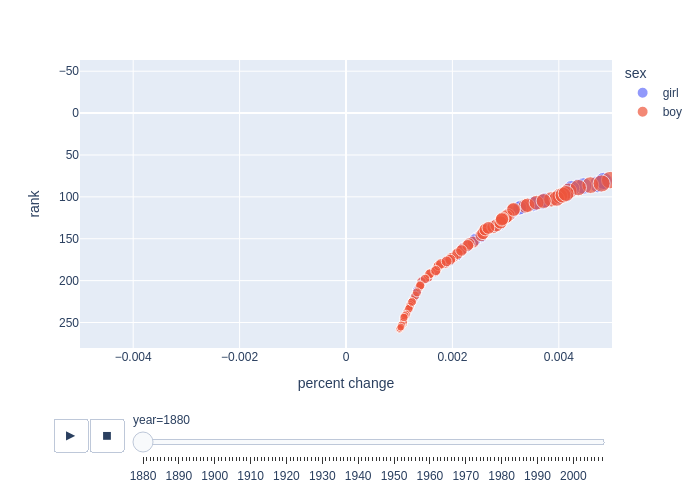

In [38]:
# Question 8

import pandas as pd
import plotly.express as px

# Load and preprocess the data
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name'] + " " + bn['sex']  # Make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])

# Create the increase or decrease in name prevalence from the last year
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]  # Restrict to "common" names

# Create the scatter plot
fig = px.scatter(
    bn,
    x="percent change",  # x-axis
    y="rank",  # y-axis
    animation_frame="year",  # Animation frame
    animation_group="name",  # Animation group
    size="percent",  # Size of the markers
    color="sex",  # Color by sex
    hover_name="name",  # Hover text
    size_max=50,  # Maximum marker size
    range_x=[-0.005, 0.005]  # X-axis range
)

# Update y-axis to reverse order so rank 1 is on top
fig.update_yaxes(autorange='reversed')

# Show the plot with PNG renderer for submissions
fig.show(renderer="png")

# Summary - Customizing Plotly Scatter Plots: You wanted to customize a Plotly scatter plot for the Gapminder dataset, adjusting colors for continents. I provided code to set custom colors for each continent. Creating a New Scatter Plot with Different Parameters: You asked for a scatter plot with different parameters using a dataset from a provided URL. I supplied code to load the dataset, calculate the required columns, and create the scatter plot with specific customizations. Preprocessing and Plotting Baby Names Data: You provided code to preprocess baby names data, including making names distinct by sex, calculating percent changes, and ranking. I completed the px.scatter function setup to match your specifications, including setting axes, animations, and marker sizes. I noted that you prefer to use fig.show(renderer="png") for GitHub and MarkUs submissions.
# https://chatgpt.com/share/66f4b6b6-2860-8004-bdf3-72d77a27fb2f


Question 9
Somewhat